In [288]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

"""
Todo
Add multiplyer
Add put
"""

In [317]:
class OptionPosition:
    def __init__(self, spot_price):
        self.spot_price = spot_price
        self.stock_range = self.__create_range((0.8,1.2))
        self.positions = []
        
    def __create_range(self, _iv_range):
        _sr = np.arange(_iv_range[0]*self.spot_price, _iv_range[1]*self.spot_price, 1)
        _sr = np.floor(_sr)
        return _sr
    
    def add_call(self, strike_price, premium, long_short="long", multi=1):
        if long_short == "long": 
            _payoff = np.where(self.stock_range > strike_price, (self.stock_range - strike_price), 0) - premium
        else:
            _payoff = np.where(self.stock_range > strike_price, (strike_price - self.stock_range), 0) + premium        
        
        self.positions.append({"name": long_short.title()+" Call", "payoff": _payoff, "strike_price": strike_price, "premium": premium})
        
        _message = "Added a {} call position with strike at ${} for ${:.2f} premium".format(long_short, strike_price, float(premium))
        return _message
    
    def add_put(self, strike_price, premium, long_short="long", multi=1):
        if long_short == "long": 
            _payoff = np.where(self.stock_range < strike_price, (self.stock_range - strike_price), 0) - premium
        else:
            _payoff = np.where(self.stock_range < strike_price, (strike_price - self.stock_range), 0) + premium        
        
        self.positions.append({"name": long_short.title()+" Put", "payoff": _payoff, "strike_price": strike_price, "premium": premium})
        
        _message = "Added a {} put position with strike at ${} for ${:.2f} premium".format(long_short, strike_price, float(premium))
        return _message
    
    def __repr__(self):
        _positions = "Positions Created: \n"
        for pos in self.positions:
            _positions = _positions + str(pos) + '\n'
        return _positions
    
    def plot_all_payoffs(self):
        fig, ax = plt.subplots()
        plt.xlabel('Stock Price')
        plt.ylabel('P/L')
        ax.spines['bottom'].set_position('zero')
        for option in self.positions:
            _legend = "${:.1f} strike {} for ${:.2f}".format(float(option['strike_price']), option['name'],float(option['premium']))
            ax.plot(self.stock_range, option['payoff'], label=_legend)
        plt.legend()
        plt.show()
        
    def plot_tot_payoff(self):
        total_payoff = np.zeros_like(self.stock_range) # Create a blank P/L np array
        for option in self.positions:
            total_payoff = total_payoff + option["payoff"]
        fig, ax = plt.subplots()
        plt.xlabel('Stock Price')
        plt.ylabel('P/L')
        ax.spines['bottom'].set_position('zero')
#         _legend = "${:.1f} strike {} for ${:.2f}".format(float(option['strike_price']), option['name'],float(option['premium']))
        
        ax.plot(self.stock_range, total_payoff, label="test")
        plt.legend()
        plt.show()

In [318]:
rkt_vertical_debit = OptionPosition(100)
rkt_vertical_debit.stock_range

array([ 80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,  90.,
        91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100., 101.,
       102., 103., 104., 105., 106., 107., 108., 109., 110., 111., 112.,
       113., 114., 115., 116., 117., 118., 119.])

In [319]:
rkt_vertical_debit.add_call(95, 7.5, "long")

'Added a long put position with strike at $95 for $7.50 premium'

In [320]:
rkt_vertical_debit.add_call(110, 2.5, "short")

'Added a short put position with strike at $110 for $2.50 premium'

In [321]:
rkt_vertical_debit

Positions Created: 
{'name': 'Long Put', 'payoff': array([-22.5, -21.5, -20.5, -19.5, -18.5, -17.5, -16.5, -15.5, -14.5,
       -13.5, -12.5, -11.5, -10.5,  -9.5,  -8.5,  -7.5,  -7.5,  -7.5,
        -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,
        -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,  -7.5,
        -7.5,  -7.5,  -7.5,  -7.5]), 'strike_price': 95, 'premium': 7.5}
{'name': 'Short Put', 'payoff': array([32.5, 31.5, 30.5, 29.5, 28.5, 27.5, 26.5, 25.5, 24.5, 23.5, 22.5,
       21.5, 20.5, 19.5, 18.5, 17.5, 16.5, 15.5, 14.5, 13.5, 12.5, 11.5,
       10.5,  9.5,  8.5,  7.5,  6.5,  5.5,  4.5,  3.5,  2.5,  2.5,  2.5,
        2.5,  2.5,  2.5,  2.5,  2.5,  2.5,  2.5]), 'strike_price': 110, 'premium': 2.5}

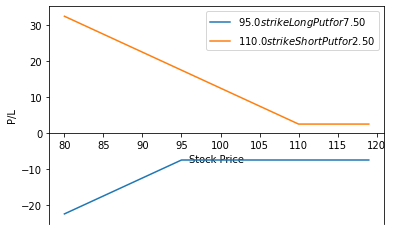

In [322]:
rkt_vertical_debit.plot_all_payoffs()

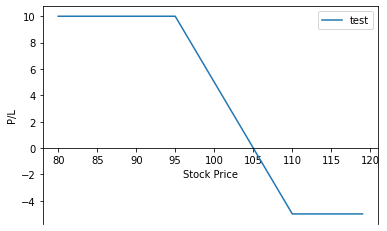

In [323]:
rkt_vertical_debit.plot_tot_payoff()